# cVAE training
This notebook shows how the dataset and models were created.
Note that if you rerun this, due to the stochacisity of neural network training, the results could differ slightly.


## Create NNDataset

Here, three different datasets are created:
- *184A1_all_frac0005_neigh3_cond_pert-CC*, from `params/data_params_all.py`.
    - This dataset contains all perturbations, a neighborhood of 3, and is subsampled to 0.5% of all mpps. 
    - Conditions are perturbation_duration and cell_cycle.
- TODO *184A1_EU10_frac005_neigh3_cond_CC-TRnormzscore*, from `params/data_params_EU10.py`.
    This dataset contains only EU10 wells, as neighborhood of 3, and is subsampled to 5% of all mpps. Conditions are cell_cycle and well-normalised and zscored TR
    - TODO do we need this dataset?
- *184A1_SBF2_frac005_neigh3_cond_siRNA-CC*, from `params/data_params_SBG2.py`
    This dataset contains the siRNA wells, a neighborhood of 3, and is subsampled to 5% of all mpps. Conditions are siRNA treatment and cell_cycle.


For (re-)creation of these datasets, run:
```
scripts/create_dataset.sh
```

### Statistics of created datasets

In [5]:
from miann.data import NNDataset
from miann.data._conditions import convert_condition
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# summary of pixels per condition
def condition_dist(ds, desc):
    cond = ds.data['train'].get_condition(desc)[:,0]
    cond_labels, freq = np.unique(convert_condition(cond, desc, data_config=ds.data_config), return_counts=True)
    plt.figure()
    sns.barplot(x=cond_labels, y=freq)
    plt.title(f'Train distribution of {desc}')
    _ = plt.xticks(rotation=90)

NNDataset for NascentRNA (shape (3, 3, 34)). train: 615240, val: 76432, test: 76956


/Users/hannah.spitzer/opt/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/Users/hannah.spitzer/opt/miniconda3/envs/pelkmans-3.9/lib/python3.9/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


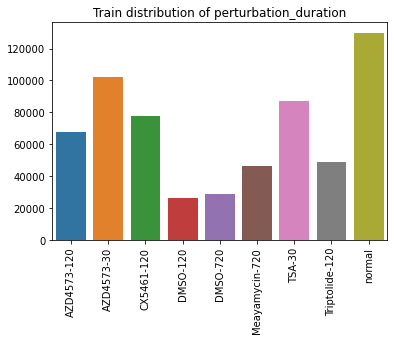

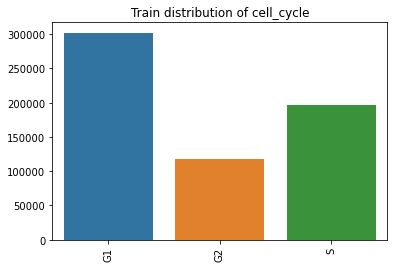

In [6]:
ds = NNDataset('184A1_all_frac0005_neigh3_cond_pert-CC', data_config='NascentRNA')
print(ds)
condition_dist(ds, 'perturbation_duration')
condition_dist(ds, 'cell_cycle')